In [27]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
from IPython.display import Image
import scanpy as sc
import seaborn as sns
import anndata as ad
from matplotlib import pyplot as plt

from shannonca.dimred import reduce_scanpy
    
np.random.seed(14)

In [3]:
adata = sc.read('../../data/raw_data/human_data/seurat_filtered_harmony_08_28_23.h5ad')

In [5]:
reduce_scanpy(adata, n_comps=50, iters=5, keep_scores=False, keep_loadings=True)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5


In [9]:
adata.varm['sca_loadings'].shape


(17204, 50)

In [11]:
sc.pp.neighbors(adata, use_rep='X_sca')

In [15]:
sc.tl.umap(adata)

In [19]:
sc.tl.leiden(adata)

In [32]:
def split_umap(adata, split_by, ncol=2, nrow=None, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.umap(adata[adata.obs[split_by] == cat], ax=ax, show=False, title=cat, **kwargs)
    plt.tight_layout()

/Users/hannah/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/hannah/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


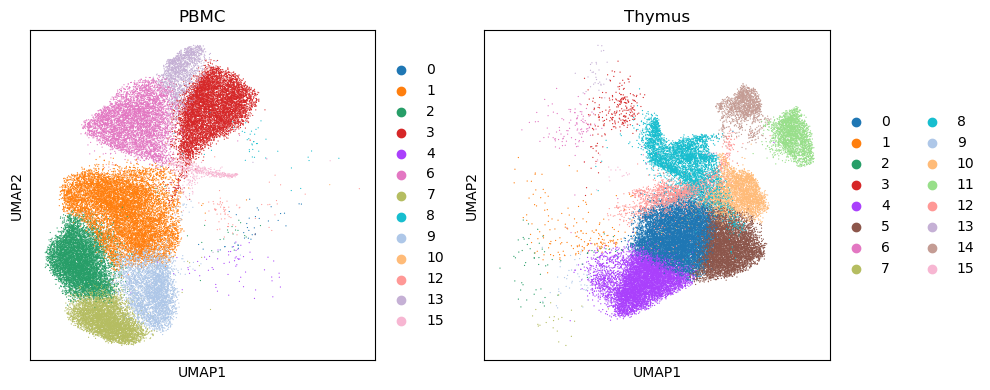

In [41]:
split_umap(adata, color=["leiden"], split_by='Tissue',legend_loc = "right margin")
plt.savefig("/Users/hannah/projects/20220809_Thymic-iNKT-CrossSpecies/data/sca/sca_group_by_tissue_and_leiden.pdf")

/Users/hannah/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/hannah/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


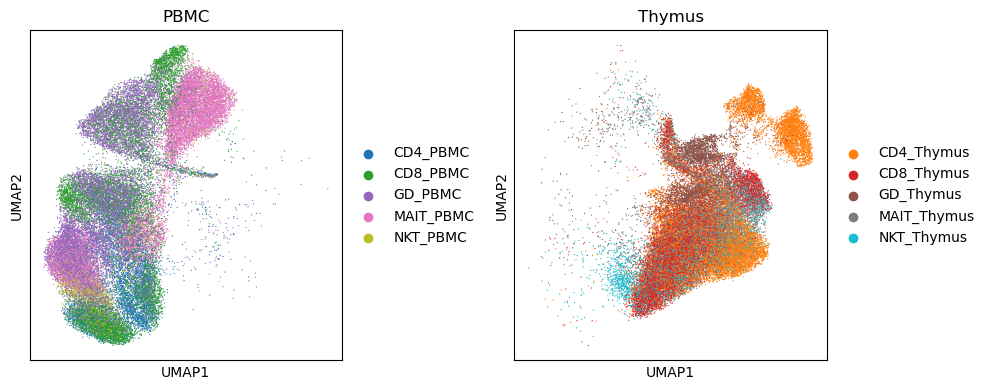

In [42]:
split_umap(adata, color=["group.ident"], split_by='Tissue',legend_loc = "right margin")
plt.savefig("/Users/hannah/projects/20220809_Thymic-iNKT-CrossSpecies/data/sca/sca_group_by_tissue_and_group.ident.pdf")

In [44]:
adata.write("/Users/hannah/projects/20220809_Thymic-iNKT-CrossSpecies/data/sca/seurat_filtered_harmony_08_28_23_sca.h5ad")